In [1]:
!pip install tweepy
!pip install configparser
!pip install pandas
!pip install transformers
!pip install datasets
!pip install tqdm
!pip3 install pydot
import pandas as pd
import numpy as np
import requests
import os
import re
import csv
import pytz
import sklearn
from datetime import datetime, timedelta
import pandas as pd
from transformers import AutoTokenizer
from transformers import TFAutoModelForSequenceClassification
import tensorflow as tf
from tensorflow.keras.losses import SparseCategoricalCrossentropy
import glob
import numpy as np
import pandas as pd

from sklearn.metrics import accuracy_score
from sklearn.metrics import matthews_corrcoef


import pyarrow as pa
import pyarrow.dataset as ds
import pandas as pd
from datasets import Dataset

import re
import csv
from transformers import pipeline
import torch.nn.functional as F
from transformers import AutoTokenizer , AutoModelForSequenceClassification
import torch


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import warnings


import pandas
from tqdm import tqdm

def labeller(directory,dataset):
    warnings.simplefilter(action='ignore', category=FutureWarning)
    tokenizer = AutoTokenizer.from_pretrained(directory)
    model = AutoModelForSequenceClassification.from_pretrained(directory)
    classifier = pipeline("sentiment-analysis", model = model, tokenizer = tokenizer,return_all_scores=True)
    #res = classifier("good")
    #print(res)
    df = dataset.copy()
    #df = pd.DataFrame(columns = ['text', 'real_label', 'Negative','Neutral','Positive',])
    guess = []
    pos = []
    neg = []
    neu = []

    for text in dataset['tweet']:  
          res = classifier(text)[0]
          r = {res[0]['label']:res[0]['score'], res[1]['label']:res[1]['score'], res[2]['label']:res[2]['score']}
          pos.append(r['Positive'])
          neg.append(r['Negative'])
          neu.append(r['Neutral'])
    is_pass = False
    if len(pos) == len(neg) and len(pos) == len(neu):
      print("pass equal pos neg neu length")
      if len(pos) == dataset.shape[0]:
        print("pass dataset equality")
        is_pass = True
      else:
        print("fail dataset equality")
    else:
      print("fail equal pos neg neu length")
    
    df["Positive"] = pos
    df["Negative"] = neg
    df['Neutral'] = neu
    return df,is_pass

#df = labeller(directory,valid)
#display(df)

#df.to_csv("/notebooks/fyp/final_modelV2/valid_F2_lex_head.csv")


In [3]:
def filter(data):
  df = data
  df = df[df["tweet"].str.contains(" crypto | cryptocurrency | bitcoin | btc ")==True]
  return df
def clean(text):
  text = re.sub(r'@[A-Za-z0-9:]+', '',text) #removes @ mentions
  text = re.sub(r'#','',text) #remove #
  text = re.sub(r'RT[\s]+','',text) # remove RT
  text = re.sub(r'https?:\/\/(www\.)?[-a-zA-Z0-9@:%._\+~#=]{1,256}\.[a-zA-Z0-9()]{1,6}\b([-a-zA-Z0-9()@:%_\+.~#?&//=]*)', '', text) #removes links
  text = re.sub(r'\s*$','',text) #remove leading and trailing whitespace
  text = re.sub(r'^\s*','',text) #remove leading and leading whitespace
  text = re.sub(r'.+:', '',text) #remove username:
  return text

def clean_data(data):
  #data = data[data.language == 'en']
  data.replace("", np.nan, inplace=True) # replace empty string to nan 
  data.dropna(subset = ["tweet"], inplace=True) #remove all rows with nan tweet
  data['tweet'] = data['tweet'].apply(clean)
  data.replace("", np.nan, inplace=True) # replace empty string to nan 
  data.dropna(subset = ["tweet"], inplace=True) #remove all rows with nan twee
  data = data.drop_duplicates(subset = 'tweet', keep = False ) # remove duplicates and keep none 
  return data

#t = df_gold.iloc[0]['tweet']


In [4]:
df1 = pd.read_csv("/content/drive/MyDrive/fyp/fyp2/twint/twint1.csv")
df2 = pd.read_csv("/content/drive/MyDrive/fyp/fyp2/twint2/twint1.csv")
df3 = pd.read_csv("/content/drive/MyDrive/fyp/fyp2/twint3/twint1.csv")
df = pd.concat([df1,df2,df3])
print(df.shape[0])
df = df.drop_duplicates( keep='first', ignore_index=True)
print(df.shape[0])
display(df)

675800
646970


,user_id,id,username,created_at,date,time,timezone,tweet,language,retweets_count,hashtags,retweet
0,1426115688339410945,1544510702961844226,bigwindollar_,2022-07-06 02:37:01 UTC,2022-07-06,02:37:01,0,@yopicoin #yopicoin x1000 🚀 #yopinetwork #bitcoin,und,0,"['yopicoin', 'yopinetwork', 'bitcoin']",False
1,260006070,1544510681751470081,dondon_wontons,2022-07-06 02:36:56 UTC,2022-07-06,02:36:56,0,You really can’t be nice to folks,en,0,[],False
2,1149166543781212160,1544510677141884928,alejito_eth,2022-07-06 02:36:55 UTC,2022-07-06,02:36:55,0,@LH_btc @traderZ0 The queen shorting too 🥂,en,0,[],False
3,812751240,1544510665158967296,cryptopatel,2022-07-06 02:36:52 UTC,2022-07-06,02:36:52,0,@BitcoinMagazine Always Bullish on #Bitcoin ❤,en,0,['bitcoin'],False
4,1519473869802786816,1544510661488586753,sasboomstick,2022-07-06 02:36:51 UTC,2022-07-06,02:36:51,0,@Eric_BIGfund Once trash tech algos stop leadi...,en,0,[],False
...,...,...,...,...,...,...,...,...,...,...,...,...
646965,1532113040501514240,1564668267473633282,patiencemlengan,2022-08-30 17:35:59 UTC,2022-08-30,17:35:59,0,@George78772946 @tWeatherSA Have you heard abo...,en,0,[],False
646966,14346923,1564668258330066945,raffel,2022-08-30 17:35:57 UTC,2022-08-30,17:35:57,0,@MarekZee It’s amazing. The grinder is the fin...,en,0,[],False
646967,295325403,1564668226616799232,redcanoe63,2022-08-30 17:35:50 UTC,2022-08-30,17:35:50,0,@btc_there4_i_am @SenTedCruz How's that retire...,en,0,[],False
646968,231796050,1564668219918532608,highertable,2022-08-30 17:35:48 UTC,2022-08-30,17:35:48,0,@markhendy @fieryseahorse @EssexPR Do you envi...,en,0,[],False


In [5]:
files = glob.glob("/content/drive/MyDrive/fyp/fyp2/final models and datasets/lstm/dataset/bitcoin_unused_clean_tweepy/*.csv")
print(files)
df_list_temp = []
for file in files:
  temp1 = pd.read_csv(file)
  df_list_temp.append(temp1)
df_res = pd.concat(df_list_temp)
display(df_res)

['/content/drive/MyDrive/fyp/fyp2/final models and datasets/lstm/dataset/bitcoin_unused_clean_tweepy/lstm_data_cleaned_1.csv', '/content/drive/MyDrive/fyp/fyp2/final models and datasets/lstm/dataset/bitcoin_unused_clean_tweepy/lstm_data_cleaned_0.csv', '/content/drive/MyDrive/fyp/fyp2/final models and datasets/lstm/dataset/bitcoin_unused_clean_tweepy/lstm_data_cleaned_3.csv', '/content/drive/MyDrive/fyp/fyp2/final models and datasets/lstm/dataset/bitcoin_unused_clean_tweepy/lstm_data_cleaned_4.csv', '/content/drive/MyDrive/fyp/fyp2/final models and datasets/lstm/dataset/bitcoin_unused_clean_tweepy/lstm_data_cleaned_2.csv', '/content/drive/MyDrive/fyp/fyp2/final models and datasets/lstm/dataset/bitcoin_unused_clean_tweepy/lstm_data_cleaned_5.csv', '/content/drive/MyDrive/fyp/fyp2/final models and datasets/lstm/dataset/bitcoin_unused_clean_tweepy/lstm_data_cleaned_6.csv', '/content/drive/MyDrive/fyp/fyp2/final models and datasets/lstm/dataset/bitcoin_unused_clean_tweepy/lstm_data_cleaned

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Unnamed: 0.1.1.1,Unnamed: 0.1.1.1.1,date,tweet,is_retweet,real_score,vader_pseudo_label
0,95259,95362,114715,114763,NaN,2021-05-28 08:30:40,"🚀 🚀4,013 BTC (154,476,000 USD) move from unkno...",False,NaN,Neutral
1,95258,95361,114714,114762,NaN,2021-05-28 08:30:41,"💵1,950 BTC (75,079,100 USD) move from unknown ...",False,NaN,Neutral
2,95257,95360,114713,114761,NaN,2021-05-28 08:30:45,❗Initiative Q is an attempt by ex-PayPal guys ...,False,NaN,Positive
3,95256,95359,114712,114760,NaN,2021-05-28 08:30:49,$BTC 🔴 - 36816.2 $ (-0.49 %)\n$ETH 🔴 - 2558 $...,False,NaN,Negative
4,95255,95358,114711,114759,NaN,2021-05-28 08:31:16,The mobile app will be using.. a remote GRIDNE...,False,NaN,Positive
...,...,...,...,...,...,...,...,...,...,...
99995,51959,2857143,3510913,3521338,NaN,2022-05-31 06:08:40,3X Long Ethereum Token (ETHBULL) went up 26.7 ...,False,NaN,Neutral
99996,51958,2857142,3510912,3521337,NaN,2022-05-31 06:08:50,ELFUSDT Bear Alert!\n\n5X Volume\n 0.1609...,False,NaN,Negative
99997,51957,2857141,3510909,3521334,NaN,2022-05-31 06:09:09,BCHUSDT Bear Alert!\n\n10X Volume\n 198.6...,False,NaN,Negative
99998,51956,2857140,3510908,3521333,NaN,2022-05-31 06:09:24,PYRUSDT Bear Alert!\n\n5X Volume\n 4.57\n...,False,NaN,Negative


In [6]:
import math
def splitter(df_,out_dir,size):
  df = df_.copy()
  splits = math.ceil(df.shape[0] / size)
  for split in range(splits):
    start = 0 + (split)*size
    end = (split+1) * size
    if end > df.shape[0]:
      end = df.shape[0]
    df_o = df[start:end]
    df_o.to_csv(out_dir +"/lstm_data_cleaned_" + str(split) +".csv")

#print(df.shape[0])
#splitter(df_cleaned,"/content/drive/MyDrive/fyp/fyp2/final models and datasets/lstm/dataset/cleaned",100000)

In [7]:
unlabelled_ = "/content/drive/MyDrive/fyp/fyp2/final models and datasets/lstm/dataset/cleaned/lstm_data_cleaned_0.csv"
out_name = "labelled_lstm_data_0"
out_dir = "/content/drive/MyDrive/fyp/fyp2/final models and datasets/lstm/dataset/labelled"
unlabelled = pd.read_csv(unlabelled_ ,lineterminator='\n')
display(unlabelled)
#df_labelled,is_pass = labeller("/content/drive/MyDrive/fyp/fyp2/final models and datasets/lstm/final model",unlabelled)
#df_labelled.to_csv(out_dir + "/" + out_name + ".csv")


,Unnamed: 0,user_id,id,username,created_at,date,time,timezone,tweet,language,retweets_count,hashtags,retweet
0,1,260006070,1544510681751470081,dondon_wontons,2022-07-06 02:36:56 UTC,2022-07-06,02:36:56,0,You really can’t be nice to folks,en,0,[],False
1,2,1149166543781212160,1544510677141884928,alejito_eth,2022-07-06 02:36:55 UTC,2022-07-06,02:36:55,0,_btc The queen shorting too 🥂,en,0,[],False
2,3,812751240,1544510665158967296,cryptopatel,2022-07-06 02:36:52 UTC,2022-07-06,02:36:52,0,Always Bullish on Bitcoin ❤,en,0,['bitcoin'],False
3,4,1519473869802786816,1544510661488586753,sasboomstick,2022-07-06 02:36:51 UTC,2022-07-06,02:36:51,0,_BIGfund Once trash tech algos stop leading bi...,en,0,[],False
4,5,54897838,1544510658988875777,botelhofabio,2022-07-06 02:36:51 UTC,2022-07-06,02:36:51,0,Change this algorithm elon,en,0,[],False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,164507,295100681,1543518873097469954,berat_2019,2022-07-03 08:55:51 UTC,2022-07-03,08:55:51,0,Bitcoin pizza stocks,en,0,[],False
99996,164508,1293821182282784776,1543518869494661123,cryptojobs3,2022-07-03 08:55:50 UTC,2022-07-03,08:55:50,0,"yes, there is a lot of scam pump and dump.. ne...",en,0,[],False
99997,164509,1094255391641358337,1543518846203699201,learbtc,2022-07-03 08:55:44 UTC,2022-07-03,08:55:44,0,_AIRmass So him being long all the way from t...,en,0,[],False
99998,164512,947260556658044928,1543518834891673601,yekkripto,2022-07-03 08:55:42 UTC,2022-07-03,08:55:42,0,BollingerAlert ! - $WTC (948 sats) is over U...,en,0,"['bollingeralert', 'crypto', 'coin']",False


In [8]:
def find_date_gaps(df):
  
  deltas = df['date'].diff()

  # Filter diffs (here days > 1, but could be seconds, hours, etc)
  gaps = deltas[deltas > timedelta(days=1)]

  # Print results
  print(f'{len(gaps)} gaps with average gap duration: {gaps.mean()}')
  for i, g in gaps.iteritems():
      gap_start = df['date'][i - 1]
      #print(type())
      end = gap_start + g.to_pytimedelta()
      print(f'Start: {datetime.strftime(gap_start, "%Y-%m-%d")} | '
            f'Duration: {str(g.to_pytimedelta())}')
      print(end)

#find_date_gaps(df_)

In [9]:
import glob
path = "/content/drive/MyDrive/fyp/fyp2/final models and datasets/lstm/dataset/labelled"
path2 = "/content/drive/MyDrive/fyp/fyp2/final models and datasets/lstm/dataset/bitcoin_unused_clean_tweepy_labelled"
path3 = "/content/drive/MyDrive/shafs stuff"
files = glob.glob(path + "/*.csv")
files2 = glob.glob(path2 + "/*.csv")
files3 = glob.glob(path3 + "/*.csv")
print(files2)
df_ls = []
df_ls2 = []
for file in files:
  df_temp = pd.read_csv(file,lineterminator='\n')
  df_ls.append(df_temp)
for file in files2:
  df_temp = pd.read_csv(file,lineterminator='\n')
  df_ls2.append(df_temp)

for file in files3:
  if file not in files2:
    print(file)
    df_temp = pd.read_csv(file,lineterminator='\n')
    df_ls2.append(df_temp)

df_o = pd.concat(df_ls)
df_o2 = pd.concat(df_ls2)
display(df_o)
display(df_o2)

['/content/drive/MyDrive/fyp/fyp2/final models and datasets/lstm/dataset/bitcoin_unused_clean_tweepy_labelled/unused_bitcoin_labelled_0.csv', '/content/drive/MyDrive/fyp/fyp2/final models and datasets/lstm/dataset/bitcoin_unused_clean_tweepy_labelled/unused_bitcoin_labelled_6.csv', '/content/drive/MyDrive/fyp/fyp2/final models and datasets/lstm/dataset/bitcoin_unused_clean_tweepy_labelled/unused_bitcoin_labelled_3.csv', '/content/drive/MyDrive/fyp/fyp2/final models and datasets/lstm/dataset/bitcoin_unused_clean_tweepy_labelled/unused_bitcoin_labelled_12.csv', '/content/drive/MyDrive/fyp/fyp2/final models and datasets/lstm/dataset/bitcoin_unused_clean_tweepy_labelled/unused_bitcoin_labelled_15.csv', '/content/drive/MyDrive/fyp/fyp2/final models and datasets/lstm/dataset/bitcoin_unused_clean_tweepy_labelled/unused_bitcoin_labelled_7.csv', '/content/drive/MyDrive/fyp/fyp2/final models and datasets/lstm/dataset/bitcoin_unused_clean_tweepy_labelled/unused_bitcoin_labelled_4.csv', '/content/

,Unnamed: 0,Unnamed: 0.1,user_id,id,username,created_at,date,time,timezone,tweet,language,retweets_count,hashtags,retweet,Positive,Negative,Neutral
0,0,646474,3100174815,1564671267629834240,duganist,2022-08-30 17:47:55 UTC,2022-08-30,17:47:55,0,"FTX is a better version of Coinbase, a better ...",en,0,[],False,0.317264,0.067153,0.615583
1,1,646476,1391254762499153922,1564671264446373889,zetamarkets,2022-08-30 17:47:54 UTC,2022-08-30,17:47:54,0,_btc we like Marty,en,0,[],False,0.164208,0.012036,0.823756
2,2,646478,1271976542063620096,1564671251091693568,dficoastalmoons,2022-08-30 17:47:51 UTC,2022-08-30,17:47:51,0,_Archive until a certain political party gets ...,en,0,[],False,0.131345,0.120781,0.747873
3,3,646480,1530613111992078339,1564671239817420800,carllyleryan,2022-08-30 17:47:48 UTC,2022-08-30,17:47:48,0,"$BTC bottom $13,200 October 9th",en,1,[],False,0.109417,0.406267,0.484316
4,4,646481,1402739758015520771,1564671237019668481,animalconcerts,2022-08-30 17:47:47 UTC,2022-08-30,17:47:47,0,"@_TheFigen Can confirm, this works. How I re...",en,2,[],False,0.752398,0.010857,0.236744
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,99995,164507,295100681,1543518873097469954,berat_2019,2022-07-03 08:55:51 UTC,2022-07-03,08:55:51,0,Bitcoin pizza stocks,en,0,[],False,0.626730,0.067146,0.306124
99996,99996,164508,1293821182282784776,1543518869494661123,cryptojobs3,2022-07-03 08:55:50 UTC,2022-07-03,08:55:50,0,"yes, there is a lot of scam pump and dump.. ne...",en,0,[],False,0.192978,0.441299,0.365723
99997,99997,164509,1094255391641358337,1543518846203699201,learbtc,2022-07-03 08:55:44 UTC,2022-07-03,08:55:44,0,_AIRmass So him being long all the way from t...,en,0,[],False,0.315799,0.340557,0.343645
99998,99998,164512,947260556658044928,1543518834891673601,yekkripto,2022-07-03 08:55:42 UTC,2022-07-03,08:55:42,0,BollingerAlert ! - $WTC (948 sats) is over U...,en,0,"['bollingeralert', 'crypto', 'coin']",False,0.350711,0.085211,0.564078


,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Unnamed: 0.1.1.1,Unnamed: 0.1.1.1.1,Unnamed: 0.1.1.1.1.1,date,tweet,is_retweet,real_score,vader_pseudo_label,Positive,Negative,Neutral,Unnamed: 0.2,Neutral\r
0,0,18189,18205,21517,21524.0,NaN,2021-02-05 10:52:04,📖 Weekend Read 📖\n\nKeen to learn about crypt...,False,NaN,Positive,0.415671,0.016809,0.567520,NaN,NaN
1,1,18188,18204,21513,21520.0,NaN,2021-02-05 10:52:26,reddcoin rdd to the moon altcoin turnreddcoin...,False,NaN,Neutral,0.562627,0.068772,0.368602,NaN,NaN
2,2,18187,18203,21512,21519.0,NaN,2021-02-05 10:53:49,Bitcoin and ETH both have bullish setups for a...,False,NaN,Positive,0.896245,0.024557,0.079198,NaN,NaN
3,3,18186,18202,21511,21518.0,NaN,2021-02-05 10:54:52,$PERL 0.06.\nI have insisted that since 0.02 i...,False,NaN,Positive,0.649427,0.096485,0.254087,NaN,NaN
4,4,18185,18201,21510,21517.0,NaN,2021-02-05 10:57:05,Amazing 😍\nMonopoly Crypto cryptocurrency cryp...,False,NaN,Positive,0.614979,0.007106,0.377915,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,99995,2340491,2876181,2884479,NaN,NaN,2022-04-21 15:37:05,🚨 JNL SERIES TRUST filed a 485BPOS SEC filing ...,False,NaN,Positive,0.183479,0.025951,NaN,36817.0,0.790571
99996,99996,2340490,2876180,2884478,NaN,NaN,2022-04-21 15:37:06,Crypto market Overview\n\n40.71%\nCHOP Season✔...,False,NaN,Positive,0.253531,0.309027,NaN,36816.0,0.437442
99997,99997,2340489,2876179,2884477,NaN,NaN,2022-04-21 15:37:06,This zesty faucet from @_bitcoiner is making m...,False,NaN,Positive,0.257304,0.042683,NaN,36815.0,0.700013
99998,99998,2340488,2876178,2884476,NaN,NaN,2022-04-21 15:37:07,🚨 TRADING ADVICE 🚨\n\nDon’t FOMO here 🤝bitcoin,False,NaN,Neutral,0.053780,0.038835,NaN,36814.0,0.907385


In [10]:
#check timezones
timezone_ls = []
for i in df_o['timezone']:
  if i not in timezone_ls:
    timezone_ls.append(i)
    print(i)
print("all the timezones are: " , timezone_ls)
if len(timezone_ls) == 1:
  print("all same timezone")
else:
  print("all not same timezone")

0
all the timezones are:  [0]
all same timezone


In [11]:
df1 = df_o.copy()
df2 = df_o2.copy()
#display(pytz.all_timezones) 
df1['created_at'] = pd.to_datetime(df1['created_at'], format='%Y-%m-%d %H:%M:%S %Z')
df2['date'] = pd.to_datetime(df2['date'], format='%Y-%m-%d %H:%M:%S')


#convert from utc to est as bitcoin data is in est
df2['date'] = df2['date'].dt.tz_localize("GMT").dt.tz_convert('est')
df1['created_at'] = df1['created_at'].dt.tz_convert('est')

#print("bob 34")
df1 = df1[['created_at','tweet','Positive','Neutral','Negative']]
df1 = df1.rename(columns={"created_at": "date"})
df2 = df2[['date','tweet','Positive','Neutral','Negative']]
#display(df1)
#display(df2)
df = pd.concat([df1,df2])
df = df.drop_duplicates(subset=['date', 'tweet'], keep='first')
print(df1.shape[0],'  ',df2.shape[0],'  ',df1.shape[0]+df2.shape[0]),
display(df)

#df['date'] = df['date'].apply(lambda t: t.strftime('%Y-%m-%d %H'))
df['date'] = df['date'].apply(lambda t: t.strftime('%Y-%m-%d'))


df_pos = df.groupby([df['date']])['Positive'].mean().to_frame()
df_neu = df.groupby([df['date']])['Neutral'].mean().to_frame()
df_neg = df.groupby([df['date']])['Negative'].mean().to_frame()
#df_count = df.groupby([df['date']]).count()[['date','tweet']]
df_count = df.groupby([df['date']])['tweet'].count().to_frame()
df = df_neg
df['Neutral'] = df_neu['Neutral']
df['Positive'] = df_pos['Positive']
df['count'] = df_count['tweet']
display(df)
print(df.shape[0])

400308    2869965    3270273


,date,tweet,Positive,Neutral,Negative
0,2022-08-30 12:47:55-05:00,"FTX is a better version of Coinbase, a better ...",0.317264,0.615583,0.067153
1,2022-08-30 12:47:54-05:00,_btc we like Marty,0.164208,0.823756,0.012036
2,2022-08-30 12:47:51-05:00,_Archive until a certain political party gets ...,0.131345,0.747873,0.120781
3,2022-08-30 12:47:48-05:00,"$BTC bottom $13,200 October 9th",0.109417,0.484316,0.406267
4,2022-08-30 12:47:47-05:00,"@_TheFigen Can confirm, this works. How I re...",0.752398,0.236744,0.010857
...,...,...,...,...,...
99995,2022-04-21 10:37:05-05:00,🚨 JNL SERIES TRUST filed a 485BPOS SEC filing ...,0.183479,NaN,0.025951
99996,2022-04-21 10:37:06-05:00,Crypto market Overview\n\n40.71%\nCHOP Season✔...,0.253531,NaN,0.309027
99997,2022-04-21 10:37:06-05:00,This zesty faucet from @_bitcoiner is making m...,0.257304,NaN,0.042683
99998,2022-04-21 10:37:07-05:00,🚨 TRADING ADVICE 🚨\n\nDon’t FOMO here 🤝bitcoin,0.053780,NaN,0.038835


,Negative,Neutral,Positive,count
date,,,,
2021-02-05,0.090510,0.468611,0.440879,1875
2021-02-06,0.087718,0.457682,0.454601,2586
2021-02-07,0.076292,0.513266,0.410442,2183
2021-02-08,0.074992,0.408843,0.516166,5455
2021-02-09,0.079048,0.440184,0.480768,3417
...,...,...,...,...
2022-07-25,0.181530,0.452563,0.365908,26122
2022-07-26,0.184805,0.447625,0.367570,26304
2022-07-27,0.170858,0.457783,0.371359,27313


179


In [12]:

import pandas as pd
import requests
import json

def fetch_daily_data(symbol):
  pair_split = symbol.split('/')  # symbol must be in format XXX/XXX ie. BTC/EUR
  symbol = pair_split[0] + '-' + pair_split[1]
  url = f'https://api.pro.coinbase.com/products/{symbol}/candles?granularity=86400'
  response = requests.get(url)
  if response.status_code == 200:  # check to make sure the response from server is good
    data = pd.DataFrame(json.loads(response.text), columns=['unix', 'low', 'high', 'open', 'close', 'volume'])
    data['date'] = pd.to_datetime(data['unix'], unit='s')  # convert to a readable date
    data['vol_fiat'] = data['volume'] * data['close']      # multiply the BTC volume by closing price to approximate fiat volume

# if we failed to get any data, print an error...otherwise write the file
    if data is None:
      print("Did not return any data from Coinbase for this symbol")
    else:
      #data.to_csv(f'Coinbase_{pair_split[0] + pair_split[1]}_dailydata.csv', index=False)
      return data
  else:
    print("Did not receieve OK response from Coinbase API")



                                   

In [13]:
#bit_price = pd.read_csv('/content/drive/MyDrive/fyp/fyp2/Bitstamp_BTCUSD_d.csv')
pair = "BTC/USD"
#bit_price = fetch_daily_data(pair)
bit_price = pd.read_csv("/content/drive/MyDrive/fyp/fyp2/final models and datasets/lstm/dataset/bitcoin price/Gemini_BTCUSD_d.csv")
#bit_price = bit_price.reset_index(level=0)
display(bit_price)

bit_price['date'] = pd.to_datetime(bit_price['date'], format='%d/%m/%Y %H:%M')
#bit_price['date2'] = pd.to_datetime(bit_price['date'], unit='s')
bit_price = bit_price[['date', 'close']]
bit_price['date'] = bit_price['date'].apply(lambda t: t.strftime('%Y-%m-%d'))
#bit_price['date2'] = bit_price['date']
bit_price.set_index('date',inplace = True)
#bit_price = bit_price.rename(columns={'date2':'date'})
display(bit_price)


,unix,date,symbol,open,high,low,close,Volume BTC,Volume USD
0,1.662180e+12,03/09/2022 04:00,BTC/USD,19898.38,19967.65,19665.83,19826.17,317.296150,6.290767e+06
1,1.662090e+12,02/09/2022 04:00,BTC/USD,20165.78,20434.56,19764.91,19898.38,984.727228,1.959448e+07
2,1.662000e+12,01/09/2022 04:00,BTC/USD,20022.02,20235.81,19568.96,20165.78,1843.976726,3.718523e+07
3,1.661920e+12,31/08/2022 04:00,BTC/USD,20413.79,20484.98,19877.66,20022.02,1269.857927,2.542512e+07
4,1.661830e+12,30/08/2022 04:00,BTC/USD,20268.62,20561.70,19549.66,20413.79,1519.798134,3.102484e+07
...,...,...,...,...,...,...,...,...,...
2518,1.444622e+09,12/10/2015 04:00,BTC/USD,248.98,248.98,245.75,245.75,71.047743,1.745998e+04
2519,1.444536e+09,11/10/2015 04:00,BTC/USD,246.30,249.50,245.96,248.98,22.747091,5.663571e+03
2520,1.444450e+09,10/10/2015 04:00,BTC/USD,245.51,246.30,244.60,246.30,30.870549,7.603416e+03
2521,1.444363e+09,09/10/2015 04:00,BTC/USD,243.60,249.97,243.60,245.51,61.587068,1.512024e+04


,close
date,
2022-09-03,19826.17
2022-09-02,19898.38
2022-09-01,20165.78
2022-08-31,20022.02
2022-08-30,20413.79
...,...
2015-10-12,245.75
2015-10-11,248.98
2015-10-10,246.30


In [14]:
#df_merged = df.merge(bit_price, left_index=True, right_index=True)
df_merged = pd.merge(bit_price, df, left_index=True, right_index=True)
display(df)
display(bit_price)
display(df_merged)

,Negative,Neutral,Positive,count
date,,,,
2021-02-05,0.090510,0.468611,0.440879,1875
2021-02-06,0.087718,0.457682,0.454601,2586
2021-02-07,0.076292,0.513266,0.410442,2183
2021-02-08,0.074992,0.408843,0.516166,5455
2021-02-09,0.079048,0.440184,0.480768,3417
...,...,...,...,...
2022-07-25,0.181530,0.452563,0.365908,26122
2022-07-26,0.184805,0.447625,0.367570,26304
2022-07-27,0.170858,0.457783,0.371359,27313


,close
date,
2022-09-03,19826.17
2022-09-02,19898.38
2022-09-01,20165.78
2022-08-31,20022.02
2022-08-30,20413.79
...,...
2015-10-12,245.75
2015-10-11,248.98
2015-10-10,246.30


,close,Negative,Neutral,Positive,count
date,,,,,
2022-08-30,20413.79,0.178000,0.447730,0.374270,8313
2022-07-28,23921.33,0.173140,0.447520,0.379340,11760
2022-07-27,23126.10,0.170858,0.457783,0.371359,27313
2022-07-26,21076.57,0.184805,0.447625,0.367570,26304
2022-07-25,21147.15,0.181530,0.452563,0.365908,26122
...,...,...,...,...,...
2021-02-09,46309.88,0.079048,0.440184,0.480768,3417
2021-02-08,46653.50,0.074992,0.408843,0.516166,5455
2021-02-07,38107.34,0.076292,0.513266,0.410442,2183


In [15]:

df = df_merged.copy()
df.index = pd.to_datetime(df.index)
df = df.sort_index()
df_ = df.reset_index()
find_date_gaps(df_)
#display(df)
#print(type(df_["date"].iloc[0]))
# create new datetime index based on specified range
daterng_all = pd.date_range(start=df_["date"].iloc[0], end=df_["date"].iloc[-1])
print("BOB")
display(daterng_all)
# create rows with missing intervals and fill missing data
display(df)
df_test = df.reindex(daterng_all, fill_value=np.nan)
display(df_test)
df = df_test.reset_index()
df = df.rename(columns={'index': 'date'})
#df = df.rename_axis('index1').reset_index()

display(df)
find_date_gaps(df)

38 gaps with average gap duration: 11 days 08:12:37.894736842
Start: 2021-02-10 | Duration: 3 days, 0:00:00
2021-02-13 00:00:00
Start: 2021-02-15 | Duration: 3 days, 0:00:00
2021-02-18 00:00:00
Start: 2021-02-19 | Duration: 3 days, 0:00:00
2021-02-22 00:00:00
Start: 2021-02-22 | Duration: 6 days, 0:00:00
2021-02-28 00:00:00
Start: 2021-02-28 | Duration: 11 days, 0:00:00
2021-03-11 00:00:00
Start: 2021-03-12 | Duration: 24 days, 0:00:00
2021-04-05 00:00:00
Start: 2021-04-12 | Duration: 5 days, 0:00:00
2021-04-17 00:00:00
Start: 2021-04-24 | Duration: 31 days, 0:00:00
2021-05-25 00:00:00
Start: 2021-05-28 | Duration: 26 days, 0:00:00
2021-06-23 00:00:00
Start: 2021-06-23 | Duration: 9 days, 0:00:00
2021-07-02 00:00:00
Start: 2021-07-05 | Duration: 10 days, 0:00:00
2021-07-15 00:00:00
Start: 2021-07-30 | Duration: 5 days, 0:00:00
2021-08-04 00:00:00
Start: 2021-08-09 | Duration: 5 days, 0:00:00
2021-08-14 00:00:00
Start: 2021-08-21 | Duration: 2 days, 0:00:00
2021-08-23 00:00:00
Start: 20

DatetimeIndex(['2021-02-05', '2021-02-06', '2021-02-07', '2021-02-08',
               '2021-02-09', '2021-02-10', '2021-02-11', '2021-02-12',
               '2021-02-13', '2021-02-14',
               ...
               '2022-08-21', '2022-08-22', '2022-08-23', '2022-08-24',
               '2022-08-25', '2022-08-26', '2022-08-27', '2022-08-28',
               '2022-08-29', '2022-08-30'],
              dtype='datetime64[ns]', length=572, freq='D')

,close,Negative,Neutral,Positive,count
date,,,,,
2021-02-05,39415.76,0.090510,0.468611,0.440879,1875
2021-02-06,38897.95,0.087718,0.457682,0.454601,2586
2021-02-07,38107.34,0.076292,0.513266,0.410442,2183
2021-02-08,46653.50,0.074992,0.408843,0.516166,5455
2021-02-09,46309.88,0.079048,0.440184,0.480768,3417
...,...,...,...,...,...
2022-07-25,21147.15,0.181530,0.452563,0.365908,26122
2022-07-26,21076.57,0.184805,0.447625,0.367570,26304
2022-07-27,23126.10,0.170858,0.457783,0.371359,27313


,close,Negative,Neutral,Positive,count
2021-02-05,39415.76,0.090510,0.468611,0.440879,1875.0
2021-02-06,38897.95,0.087718,0.457682,0.454601,2586.0
2021-02-07,38107.34,0.076292,0.513266,0.410442,2183.0
2021-02-08,46653.50,0.074992,0.408843,0.516166,5455.0
2021-02-09,46309.88,0.079048,0.440184,0.480768,3417.0
...,...,...,...,...,...
2022-08-26,NaN,NaN,NaN,NaN,NaN
2022-08-27,NaN,NaN,NaN,NaN,NaN
2022-08-28,NaN,NaN,NaN,NaN,NaN
2022-08-29,NaN,NaN,NaN,NaN,NaN


,date,close,Negative,Neutral,Positive,count
0,2021-02-05,39415.76,0.090510,0.468611,0.440879,1875.0
1,2021-02-06,38897.95,0.087718,0.457682,0.454601,2586.0
2,2021-02-07,38107.34,0.076292,0.513266,0.410442,2183.0
3,2021-02-08,46653.50,0.074992,0.408843,0.516166,5455.0
4,2021-02-09,46309.88,0.079048,0.440184,0.480768,3417.0
...,...,...,...,...,...,...
567,2022-08-26,NaN,NaN,NaN,NaN,NaN
568,2022-08-27,NaN,NaN,NaN,NaN,NaN
569,2022-08-28,NaN,NaN,NaN,NaN,NaN
570,2022-08-29,NaN,NaN,NaN,NaN,NaN


0 gaps with average gap duration: NaT


In [16]:
#display(daterng_all)
display(df)
for i in df['date']:
  print(type(i))

,date,close,Negative,Neutral,Positive,count
0,2021-02-05,39415.76,0.090510,0.468611,0.440879,1875.0
1,2021-02-06,38897.95,0.087718,0.457682,0.454601,2586.0
2,2021-02-07,38107.34,0.076292,0.513266,0.410442,2183.0
3,2021-02-08,46653.50,0.074992,0.408843,0.516166,5455.0
4,2021-02-09,46309.88,0.079048,0.440184,0.480768,3417.0
...,...,...,...,...,...,...
567,2022-08-26,NaN,NaN,NaN,NaN,NaN
568,2022-08-27,NaN,NaN,NaN,NaN,NaN
569,2022-08-28,NaN,NaN,NaN,NaN,NaN
570,2022-08-29,NaN,NaN,NaN,NaN,NaN


<class 'pandas._libs.tslibs.timestamps.Timestamp'>
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
<class 'pandas._libs.tslibs.tim

In [26]:
# https://youtu.be/tepxdcepTbY
"""
@author: Sreenivas Bhattiprolu
Code tested on Tensorflow: 2.2.0
    Keras: 2.4.3
dataset: https://finance.yahoo.com/quote/GE/history/
Also try S&P: https://finance.yahoo.com/quote/%5EGSPC/history?p=%5EGSPC
"""
#base code taken from above but modified to fit my needs

import tensorflow
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense, Dropout
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns
#from datetime import datetime

#Read the csv file
#df = pd.read_csv('data/GE.csv')
def create_scaler(df):
  cols = list(df)[1:6]
  df_ = df[cols].astype(float)
  scaler = StandardScaler()
  scaler = scaler.fit(df_)
  return scaler

def create_model(df,num_of_epoch=1000,n_past = 5,n_future = 1,scaler = None,valid_split = 0.1):
  #print(df.head()) #7 columns, including the Date. 

  #Separate dates for future plotting
  train_dates = pd.to_datetime(df['date'])
  #print(train_dates.tail(15)) #Check last few dates. 

  #Variables for training
  cols = list(df)[1:6]
  #Date and volume columns are not used in training. 
  #print(cols) #['Open', 'High', 'Low', 'Close', 'Adj Close']


  #New dataframe with only training data - 5 columns
  df_for_training = df[cols].astype(float)

  # df_for_plot=df_for_training.tail(5000)
  # df_for_plot.plot.line()

  #LSTM uses sigmoid and tanh that are sensitive to magnitude so values need to be normalized
  # normalize the dataset
  if scaler == None:
    scaler = StandardScaler()
    scaler = scaler.fit(df_for_training)
  df_for_training_scaled = scaler.transform(df_for_training)
  #print("scaled df is below")
  #display(df_for_training_scaled)

  #As required for LSTM networks, we require to reshape an input data into n_samples x timesteps x n_features. 
  #In this example, the n_features is 5. We will make timesteps = 14 (past days data used for training). 

  #Empty lists to be populated using formatted training data
  trainX = []
  trainY = []

  #n_future = 1   # Number of days we want to look into the future based on the past days.
  #n_past = 5  # Number of past days we want to use to predict the future.

  #Reformat input data into a shape: (n_samples x timesteps x n_features)
  #In my example, my df_for_training_scaled has a shape (12823, 5)
  #12823 refers to the number of data points and 5 refers to the columns (multi-variables).
  for i in range(n_past, len(df_for_training_scaled) - n_future +1):
      x = df_for_training_scaled[i - n_past:i, 0:df_for_training.shape[1]]
      y = df_for_training_scaled[i + n_future - 1:i + n_future, 0]
      if not np.isnan(x).any() and not np.isnan(y).any():
        #display(x)
        #display(y)
        trainX.append(x)
        trainY.append(y)
  #print("size of trainX: ", len(trainX))
  trainX, trainY = np.array(trainX), np.array(trainY)

  #print('trainX shape == {}.'.format(trainX.shape))
  #print('trainY shape == {}.'.format(trainY.shape))

  #In my case, trainX has a shape (12809, 14, 5). 
  #12809 because we are looking back 14 days (12823 - 14 = 12809). 
  #Remember that we cannot look back 14 days until we get to the 15th day. 
  #Also, trainY has a shape (12809, 1). Our model only predicts a single value, but 
  #it needs multiple variables (5 in my example) to make this prediction. 
  #This is why we can only predict a single day after our training, the day after where our data ends.
  #To predict more days in future, we need all the 5 variables which we do not have. 
  #We need to predict all variables if we want to do that. 

  # define the Autoencoder model

  from keras.utils.vis_utils import plot_model
  model = Sequential()
  model.add(LSTM(64, activation='relu', input_shape=(trainX.shape[1], trainX.shape[2]), return_sequences=True))
  model.add(LSTM(32, activation='relu', return_sequences=False))
  model.add(Dropout(0.2))
  model.add(Dense(trainY.shape[1]))
  plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)
  tf.keras.utils.plot_model(model,to_file='model_plot.png',show_shapes=True)
  model.compile(optimizer='adam', loss='mse')

  #model.summary()


  # fit the model
  size = len(trainX)
  #print(size)
  valid_size = int(round(size*valid_split))
  #print(valid_size)
  trainX_ = trainX[0:size -valid_size]
  trainY_ = trainY[0:size -valid_size]
  validX = trainX[size -valid_size:size]
  validY = trainY[size -valid_size:size]

  #print("lengthsss")
  #print(len(trainX_))
  #print(len(validY))

  #history = model.fit(trainX, trainY, epochs=num_of_epoch, batch_size=16, validation_split=0.1, verbose=1)
  history = model.fit(trainX_, trainY_, epochs=num_of_epoch, batch_size=16, validation_data=(validX,validY), verbose=0)

  #plt.plot(history.history['loss'], label='Training loss')
  #plt.plot(history.history['val_loss'], label='Validation loss')
  #plt.legend()
  #print(trainX[0])
  #print(len(trainX[0]))
  return model,scaler,(trainX_, trainY_),(validX,validY)
display(df.head(4))
#model,scaler,t,v = create_model(df,num_of_epoch =20, n_past = 2)


,date,close,Negative,Neutral,Positive,count
0,2021-02-05,39415.76,0.090510,0.468611,0.440879,1875.0
1,2021-02-06,38897.95,0.087718,0.457682,0.454601,2586.0
2,2021-02-07,38107.34,0.076292,0.513266,0.410442,2183.0
3,2021-02-08,46653.50,0.074992,0.408843,0.516166,5455.0


In [18]:
def update__(df,train,valid,num_of_epoch = 1,n_past = 5,n_future = 1,scaler = None):

  train_dates = pd.to_datetime(df['date'])
  #print(train_dates.tail(15)) #Check last few dates. 

  #Variables for training
  cols = list(df)[1:6]
  #Date and volume columns are not used in training. 
  #print(cols) #['Open', 'High', 'Low', 'Close', 'Adj Close']


  #New dataframe with only training data - 5 columns
  df_for_training = df[cols].astype(float)

  # df_for_plot=df_for_training.tail(5000)
  # df_for_plot.plot.line()

  #LSTM uses sigmoid and tanh that are sensitive to magnitude so values need to be normalized
  # normalize the dataset
  if scaler == None:
    scaler = StandardScaler()
    scaler = scaler.fit(df_for_training)
  df_for_training_scaled = scaler.transform(df_for_training)
  display(df_for_training_scaled)

  #As required for LSTM networks, we require to reshape an input data into n_samples x timesteps x n_features. 
  #In this example, the n_features is 5. We will make timesteps = 14 (past days data used for training). 

  #Empty lists to be populated using formatted training data
  trainX = []
  trainY = []

  #n_future = 1   # Number of days we want to look into the future based on the past days.
  #n_past = 5  # Number of past days we want to use to predict the future.

  #Reformat input data into a shape: (n_samples x timesteps x n_features)
  #In my example, my df_for_training_scaled has a shape (12823, 5)
  #12823 refers to the number of data points and 5 refers to the columns (multi-variables).
  for i in range(n_past, len(df_for_training_scaled) - n_future +1):
      x = df_for_training_scaled[i - n_past:i, 0:df_for_training.shape[1]]
      y = df_for_training_scaled[i + n_future - 1:i + n_future, 0]
      if not np.isnan(x).any() and not np.isnan(y).any():
        #display(x)
        #display(y)
        trainX.append(x)
        trainY.append(y)

  trainX, trainY = np.array(trainX), np.array(trainY)
  
  #history = model.fit(trainX, trainY, epochs=num_of_epoch, batch_size=16, validation_split=0.1, verbose=1)
  history = model.fit(trainX, trainY, epochs=num_of_epoch, batch_size=16, validation_data=(validX,validY), verbose=0)
  model.reset_states()
  #plt.plot(history.history['loss'], label='Training loss')
  #plt.plot(history.history['val_loss'], label='Validation loss')
  #plt.legend()
  return model,scaler



In [19]:
def update(model,df,next_day_price,train,valid,num_of_epoch = 1,n_past = 5,n_future = 1,scaler = None):
  cols = list(df)[1:6]
  df_fake = pd.DataFrame(columns=cols)
  new_fake_row = {cols[0]:next_day_price,cols[1]:0,cols[2]:0,cols[3]:0,cols[4]:0}
  df_fake = df_fake.append(new_fake_row,ignore_index=True)
  #display(df_fake)
  #print(cols) #['Open', 'High', 'Low', 'Close', 'Adj Close']


  #New dataframe with only training data - 5 columns
  df_for_training = df[cols].astype(float)

  # df_for_plot=df_for_training.tail(5000)
  # df_for_plot.plot.line()

  #LSTM uses sigmoid and tanh that are sensitive to magnitude so values need to be normalized
  # normalize the dataset
  if scaler == None:
    scaler = StandardScaler()
    scaler = scaler.fit(df_for_training)
  df_for_training_scaled = scaler.transform(df_for_training)
  df_future_scaled = scaler.transform(df_fake)
  #display(df_for_training_scaled)
  #display(df_future_scaled)


  trainX = df_for_training_scaled
  trainY = df_future_scaled[0][0]#

  trainX_, trainY_ = np.array(trainX), np.array(trainY)
  trainX_ = np.expand_dims(trainX_, axis=0)
  trainY_ = np.expand_dims(trainY_, axis=0)
  trainY_ = np.expand_dims(trainY_, axis=0)
  
  trainX = np.concatenate((train[0],trainX_))
  trainY = np.concatenate((train[1],trainY_))

  
  #history = model.fit(trainX, trainY, epochs=num_of_epoch, batch_size=16, validation_split=0.1, verbose=1)
  history = model.fit(trainX, trainY, epochs=num_of_epoch, batch_size=16, validation_data=(valid[0],valid[1]), verbose=0)
  model.reset_states()
  #plt.plot(history.history['loss'], label='Training loss')
  #plt.plot(history.history['val_loss'], label='Validation loss')
  #plt.legend()
  return model,scaler,(trainX, trainY)

#print(t)
model_ = update(model,df[0:2],46000,t,v,scaler = scaler,n_past = 2)

In [20]:
def predict(model,df,pastdays = 5,scaler=None):
  
  cols = list(df)[1:6]
  #print(cols)
  df_for_training = df.tail(pastdays)
  df_for_training = df[cols].astype(float).tail(pastdays)
  if scaler == None:
    scaler = StandardScaler()
    scaler = scaler.fit(df_for_training)
  #display(df_for_training)
  df_for_training_scaled = scaler.transform(df_for_training)
  #print("scaled below")
  #display(df_for_training_scaled)
  x = np.array(df_for_training_scaled)
  #print(x)
  n_days_for_prediction = 7
  x = np.expand_dims(x, axis=0)
  #x = x.reshape(1, 1, len(x))
  prediction_raw = model.predict(x,batch_size = 1)
  prediction_copies = np.repeat(prediction_raw, len(cols), axis=-1)

  price_pred = scaler.inverse_transform(prediction_copies)[:,0]
  return price_pred,prediction_raw

display(df[:6])
price,pred = predict(model,df[:5],scaler = scaler,pastdays =2 )
print(price)
print(pred)

,date,close,Negative,Neutral,Positive,count
0,2021-02-05,39415.76,0.090510,0.468611,0.440879,1875.0
1,2021-02-06,38897.95,0.087718,0.457682,0.454601,2586.0
2,2021-02-07,38107.34,0.076292,0.513266,0.410442,2183.0
3,2021-02-08,46653.50,0.074992,0.408843,0.516166,5455.0
4,2021-02-09,46309.88,0.079048,0.440184,0.480768,3417.0
5,2021-02-10,45513.94,0.083423,0.465922,0.450655,2674.0


[51311.754]
[[0.8223235]]


In [21]:
def experiment(df_train,df_predict,past_days,bit_price,n_future = 1,update_epoch_num =1 ):
  n_past = past_days
  df_full = pd.concat([df_train,df_predict])
  df_curr = df_train
  #display(df_train)
  #display(df_predict)
  #display(df_full)
  scaler = create_scaler(df_full)
  model,scaler_,train,valid = create_model(df_train,scaler = scaler,n_past=past_days,num_of_epoch = 200)
  predictions = pd.DataFrame(columns=['date', 'real','pred' ])
  bit_price.index = pd.to_datetime(bit_price.index)
  df_predict_ls = []

  for i in range(past_days,len(df_predict)+1):
    start = i - past_days
    end = i 
    x = df_predict[start:end].copy()
    #print(x.isnull().values.any())
    #display(x)
    if not x.isnull().values.any():
      df_predict_ls.append(x)

  #print("list ting")
  #print(df_predict_ls)
  for idx,row in enumerate(df_predict_ls):
    last_day_data = row.copy().tail(1)
    #print("check check check")
    #display(row)
    date = last_day_data['date'].iloc[0] + timedelta(days = 1)
    real_price = bit_price.loc[date]['close']
    price_pred = predict(model,row,pastdays = past_days,scaler = scaler)
    new_row = {'date':date, 'real':real_price, 'pred':price_pred[0][0]}
    predictions = predictions.append(new_row,ignore_index=True)
    model,scaler__,train = update(model,row,real_price,train,valid,n_past=past_days,n_future=n_future,num_of_epoch = update_epoch_num)

  return predictions

print(df.shape[0])
pree = experiment(df[0:450],df[450:],5,bit_price)
print("finalllllll")
display(pree)

572
finalllllll


,date,real,pred
0,2022-07-01,19104.61,18585.070312
1,2022-07-02,19247.00,16028.467773
2,2022-07-03,19082.80,10769.118164
3,2022-07-04,20284.73,6280.987305
4,2022-07-05,19930.98,-181.891693
5,2022-07-06,20460.50,-1472.567505
6,2022-07-29,23814.05,3534.081055


In [22]:


display(df)
df_testy = df.copy()
import numpy as np
def make_zeros(df_,name):
  df = df_.copy()
  df[name] = np.where(np.isnan(df[name]) == False, 0, df[name])
  return df

for i in df_testy['close']:
  print(i)
  print(type(i))
df_testy = df.copy()
cols = list(df)[2:6]
for col in cols:
  df_testy = make_zeros(df_testy,col)
print(cols)
display(df_testy)
pree2 = experiment(df_testy[0:450],df_testy[450:],5,bit_price)
display(pree2)

,date,close,Negative,Neutral,Positive,count
0,2021-02-05,39415.76,0.090510,0.468611,0.440879,1875.0
1,2021-02-06,38897.95,0.087718,0.457682,0.454601,2586.0
2,2021-02-07,38107.34,0.076292,0.513266,0.410442,2183.0
3,2021-02-08,46653.50,0.074992,0.408843,0.516166,5455.0
4,2021-02-09,46309.88,0.079048,0.440184,0.480768,3417.0
...,...,...,...,...,...,...
567,2022-08-26,NaN,NaN,NaN,NaN,NaN
568,2022-08-27,NaN,NaN,NaN,NaN,NaN
569,2022-08-28,NaN,NaN,NaN,NaN,NaN
570,2022-08-29,NaN,NaN,NaN,NaN,NaN


39415.76
<class 'float'>
38897.95
<class 'float'>
38107.34
<class 'float'>
46653.5
<class 'float'>
46309.88
<class 'float'>
45513.94
<class 'float'>
nan
<class 'float'>
nan
<class 'float'>
47381.8
<class 'float'>
47185.29
<class 'float'>
49587.2
<class 'float'>
nan
<class 'float'>
nan
<class 'float'>
51241.23
<class 'float'>
55761.1
<class 'float'>
nan
<class 'float'>
nan
<class 'float'>
51847.25
<class 'float'>
nan
<class 'float'>
nan
<class 'float'>
nan
<class 'float'>
nan
<class 'float'>
nan
<class 'float'>
46408.05
<class 'float'>
nan
<class 'float'>
nan
<class 'float'>
nan
<class 'float'>
nan
<class 'float'>
nan
<class 'float'>
nan
<class 'float'>
nan
<class 'float'>
nan
<class 'float'>
nan
<class 'float'>
nan
<class 'float'>
57111.63
<class 'float'>
56705.84
<class 'float'>
nan
<class 'float'>
nan
<class 'float'>
nan
<class 'float'>
nan
<class 'float'>
nan
<class 'float'>
nan
<class 'float'>
nan
<class 'float'>
nan
<class 'float'>
nan
<class 'float'>
nan
<class 'float'>
nan
<clas

,date,close,Negative,Neutral,Positive,count
0,2021-02-05,39415.76,0.0,0.0,0.0,0.0
1,2021-02-06,38897.95,0.0,0.0,0.0,0.0
2,2021-02-07,38107.34,0.0,0.0,0.0,0.0
3,2021-02-08,46653.50,0.0,0.0,0.0,0.0
4,2021-02-09,46309.88,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...
567,2022-08-26,NaN,NaN,NaN,NaN,NaN
568,2022-08-27,NaN,NaN,NaN,NaN,NaN
569,2022-08-28,NaN,NaN,NaN,NaN,NaN
570,2022-08-29,NaN,NaN,NaN,NaN,NaN


,date,real,pred
0,2022-07-01,19104.61,10551.092773
1,2022-07-02,19247.00,8401.303711
2,2022-07-03,19082.80,5896.967773
3,2022-07-04,20284.73,3377.913086
4,2022-07-05,19930.98,40.823158
5,2022-07-06,20460.50,6.104407
6,2022-07-29,23814.05,11955.608398


In [23]:
print(df.shape)
from sklearn.metrics import mean_squared_error as mse
import numpy as np
import tensorflow as tf
import random
from statistics import mean
from random import randint


def multi_exp(df,seed,past_days,update_epoch_num):
  df_uni = df.copy()
  cols = list(df)[2:6]
  for col in cols:
    df_uni = make_zeros(df_uni,col)

  df_c = df.copy()
  df_c = make_zeros(df_c,'count')

  seed = 42
  np.random.seed(seed)
  tf.random.set_seed(seed)
  random.seed(seed)

  full = experiment(df[0:450],df[450:],past_days,bit_price,update_epoch_num=update_epoch_num)
  uni = experiment(df_uni[0:450],df_uni[450:],past_days,bit_price,update_epoch_num=update_epoch_num)
  no_c = experiment(df_c[0:450],df_c[450:],past_days,bit_price,update_epoch_num=update_epoch_num)
  #display(full)
  #display(no_c)
  #display(uni)

  full_mse = mse(full['real'],full['pred'])
  no_c_mse = mse(no_c['real'],no_c['pred'])
  uni_mse = mse(uni['real'],uni['pred'])
  out_df = pd.DataFrame() 
  out_df['date'] = full['date']
  out_df['real'] = full['real']
  out_df['full_pred'] = full['pred']
  out_df['no_count_pred'] = no_c['pred']
  out_df['univariate_close'] = uni['pred']
  #print(full_mse)
  #print(no_c_mse)
  #print(uni_mse)
  return out_df,full_mse,no_c_mse,uni_mse


#seeds = [14,843,8114,18832,124128,21,557,98664,31,64356,74,72755,3451573,1345]
def multi_runs(df,save_folder,past_days,update_epoch_num,repeat_num = 50,):
  save_folder
  seeds =[]
  for i in range(repeat_num):
    value = randint(0, 10000)
    seeds.append(value)
  full = []
  no_c = []
  uni = []
  df_out_ls = []
  for i in tqdm(seeds):
    out_df,f,c,u  = multi_exp(df,i,past_days=past_days,update_epoch_num=update_epoch_num )
    full.append(f)
    no_c.append(c)
    uni.append(u)
    df_out_ls.append(out_df)
  for idx,df in enumerate(df_out_ls):
    save = save_folder + "/lstm_res_" + str(idx) + ".csv"
  print("final values")
  print(mean(full))
  print(mean(no_c))
  print(mean(uni))

  return mean(full),mean(no_c),mean(uni)

def multi_update_epoch(df,range = 5,repeat_num = 20):
  str_ls = []
  for i in range(range):
    f,c,u = multi_runs(df,save_folder = "dasd",past_days = 5,update_epoch_num=i,repeat_num = repeat_num)
    print("num of epoch: ",i," full: ",f," no count: ",c," uni: ",u)
    str_ = "num of epoch: " + str(i) + " full: " + str(f) +" no count: "+str(c)+" uni: "+str(u)
    str_ls.append(str_)

  for i in str_ls:
    print(i)
  return(str_ls)
#str_ls = multi_update_epoch(df)

(572, 6)


,Full Multivariate,Full Multivariate with no count,Univariate
0,99567092,40715909,117228135
1,570093196,16649711,86411366
2,2591051196,19036986,85712882
3,7345883285,677102341,88751002
4,9543707618,1523559195,82655715


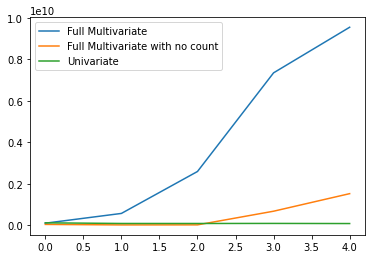

In [28]:

df_num_epoch = pd.DataFrame()
#df_num_epoch['Number of update epochs'] = [0,1,2,3,4]
df_num_epoch['Full Multivariate'] = [99567092,570093196,2591051196,7345883285,9543707618]
df_num_epoch['Full Multivariate with no count'] = [40715909,16649711,19036986,677102341,1523559195]
df_num_epoch['Univariate'] = [117228135,86411366,85712882,88751002,82655715]

display(df_num_epoch)
epoch = [0,1,2,3,4]

for i in epoch:
  plt.plot()

plt.legend()

,Unnamed: 0,Number of Past Days,Full Multivariate,Full Multivariate with no count,Univariate
0,0,2,480118482,229285696,248750461
1,1,3,70157487,926225678,64823717
2,2,4,86131242,47535849,177934801
0,0,4,86131225,47535844,177934805
3,3,5,570093229,16649712,86411350
1,1,5,570093323,16649718,86411336
4,4,6,18645940,380383520,11763066
2,2,6,18645939,380383539,11763057
5,5,7,3077038960,52467578,40493777
3,3,7,3077037327,53558406,40493763


,Unnamed: 0,Number of Past Days,Full Multivariate,Full Multivariate with no count,Univariate
0,0,5,400355416,478386117,166742560
1,1,6,131947502,238444605,11642315
2,2,7,518740823,3652583697,17922777
3,3,8,337115583,344808569,230425822


ValueError: ignored

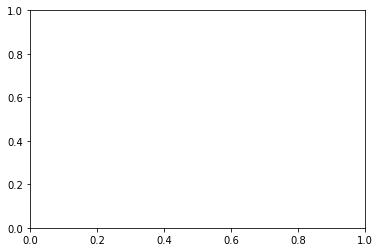

In [65]:
path1 = "/content/drive/MyDrive/fyp/fyp2/final models and datasets/lstm/final_res_multiday.csv"
path2 = "/content/drive/MyDrive/fyp/fyp2/final models and datasets/lstm/final_res_multiday2.csv"
path3 = "/content/drive/MyDrive/fyp/fyp2/final models and datasets/lstm/final_res_multiday3.csv"
path4 = "/content/drive/MyDrive/fyp/fyp2/final models and datasets/lstm/final_res_multiday4.csv"

#path1 = "/content/drive/MyDrive/fyp/fyp2/final models and datasets/lstm/final_res_multidayV2_1.csv"
#path3 = "/content/drive/MyDrive/fyp/fyp2/final models and datasets/lstm/final_res_multidayV2_2.csv"
path4 = "/content/drive/MyDrive/fyp/fyp2/final models and datasets/lstm/final_res_multidayV2_3.csv"
df_p = pd.read_csv(path1)
df_p2 = pd.read_csv(path3)
df_ = pd.concat([df_p,df_p2])

h = pd.read_csv(path4)
#display(h)
#display(df_p)
#display(df_p2)
#display(df_)
display(df_.sort_values(by=['Number of Past Days']))
display(h)
x = [2,3,4,5,6,7,8]
label = "Full Multivariate"	
plt.plot(x,df_[label],label=label)
label = "Full Multivariate with no count"	
plt.plot(x,df_[label],label=label)
label = "Univariate"	
plt.plot(x,df_[label],label=label)
plt.legend()
380383520
18645940

In [40]:
display(pd.read_csv(path4))

,Unnamed: 0,Number of Past Days,Full Multivariate,Full Multivariate with no count,Univariate
0,0,8,348991767,315129918,253017297


In [57]:
display(pd.read_csv("/content/train_F2_lex_head.csv").head(4))

,Unnamed: 0,text,real_label,Negative,Neutral,Positive
0,0,Full thanks to as they have analysed this Bit...,Neutral,0.007413,0.962344,0.030244
1,1,12 $BTC sold into the bid @ 34111 👈 Bitcoin...,Neutral,0.048345,0.406571,0.545084
2,2,Full thanks to as they have analysed this Bit...,Neutral,0.007794,0.965902,0.026304
3,3,_Latam SHINJA 🥷🔥 BUY NOW AND JUST WATC GOİNG ...,Positive,0.020884,0.310956,0.668160


In [25]:
def multi_day(df_,repeat_num = 50,update_epoch_num=1):
  df = pd.DataFrame(columns = ['Number of Past Days', 'Full Multivariate', 'Full Multivariate with no count','Univariate'])

  for i in range(4,9):
    print("doing ",i," past days")
    f,c,u = multi_runs(df_,save_folder = "dasd",past_days = i,update_epoch_num=update_epoch_num,repeat_num = repeat_num)
    new_row = {'Number of Past Days':i, 'Full Multivariate':int(f),'Full Multivariate with no count':int(c),'Univariate':int(u)}
    print("got it ")
    print(f)
    df = df.append(new_row,ignore_index=True)
    #df.to_csv("/content/drive/MyDrive/fyp/fyp2/final models and datasets/lstm/final_res_multiday3.csv")
  return df

display(df)
df_multi_day = multi_day(df,repeat_num = 50)
display(df_multi_day)

,date,close,Negative,Neutral,Positive,count
0,2021-02-05,39415.76,0.090510,0.468611,0.440879,1875.0
1,2021-02-06,38897.95,0.087718,0.457682,0.454601,2586.0
2,2021-02-07,38107.34,0.076292,0.513266,0.410442,2183.0
3,2021-02-08,46653.50,0.074992,0.408843,0.516166,5455.0
4,2021-02-09,46309.88,0.079048,0.440184,0.480768,3417.0
...,...,...,...,...,...,...
567,2022-08-26,NaN,NaN,NaN,NaN,NaN
568,2022-08-27,NaN,NaN,NaN,NaN,NaN
569,2022-08-28,NaN,NaN,NaN,NaN,NaN
570,2022-08-29,NaN,NaN,NaN,NaN,NaN


doing  4  past days


 98%|█████████▊| 49/50 [34:34<00:42, 42.33s/it]


KeyboardInterrupt: ignored

In [ ]:
#df.to_csv("/content/drive/MyDrive/fyp/fyp2/final_lstm_df.csv")

In [ ]:
print(mse(pree1['real'],pree1['pred']))
print(mse(pree2['real'],pree2['pred']))
print(mse(pree3['real'],pree3['pred']))


plt.plot(pree1['date'],pree1['real'],label = "real")
plt.plot(pree1['date'],pree1['pred'],label = "pred multi")
plt.plot(pree2['date'],pree2['pred'],label = "pred uni")
plt.plot(pree3['date'],pree3['pred'],label = "multi no count pred")
plt.legend()

In [ ]:
print(type(df))

In [ ]:

#Predicting...
#Libraries that will help us extract only business days in the US.
#Otherwise our dates would be wrong when we look back (or forward).  
from pandas.tseries.holiday import USFederalHolidayCalendar
from pandas.tseries.offsets import CustomBusinessDay
us_bd = CustomBusinessDay(calendar=USFederalHolidayCalendar())
#Remember that we can only predict one day in future as our model needs 5 variables
#as inputs for prediction. We only have all 5 variables until the last day in our dataset.
n_past = 16
n_days_for_prediction=15  #let us predict past 15 days

predict_period_dates = pd.date_range(list(train_dates)[-n_past], periods=n_days_for_prediction, freq=us_bd).tolist()
print(predict_period_dates)

#Make prediction
prediction = model.predict(trainX[-n_days_for_prediction:]) #shape = (n, 1) where n is the n_days_for_prediction

#Perform inverse transformation to rescale back to original range
#Since we used 5 variables for transform, the inverse expects same dimensions
#Therefore, let us copy our values 5 times and discard them after inverse transform
prediction_copies = np.repeat(prediction, df_for_training.shape[1], axis=-1)
y_pred_future = scaler.inverse_transform(prediction_copies)[:,0]


# Convert timestamp to date
forecast_dates = []
for time_i in predict_period_dates:
    forecast_dates.append(time_i.date())
    
df_forecast = pd.DataFrame({'date':np.array(forecast_dates), 'close':y_pred_future})
df_forecast['date']=pd.to_datetime(df_forecast['date'])


original = df[['date', 'close']]
original['date']=pd.to_datetime(original['date'])
original = original.loc[original['date'] >= '2020-5-1']

sns.lineplot(original['date'], original['close'])
sns.lineplot(df_forecast['date'], df_forecast['close'])

In [53]:
path = "/content/drive/MyDrive/fyp/fyp2/final models and datasets/dataset/dataset_0:5:5/test_dataset.csv"
bob =pd.read_csv(path,lineterminator='\n')
#display(bob.head(5))
display(df.head(5))

,date,close,Negative,Neutral,Positive,count
0,2021-02-05,39415.76,0.090510,0.468611,0.440879,1875.0
1,2021-02-06,38897.95,0.087718,0.457682,0.454601,2586.0
2,2021-02-07,38107.34,0.076292,0.513266,0.410442,2183.0
3,2021-02-08,46653.50,0.074992,0.408843,0.516166,5455.0
4,2021-02-09,46309.88,0.079048,0.440184,0.480768,3417.0
